# Machine Learning Model ANN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense

warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(15,10)})
warnings.filterwarnings('ignore')

In [2]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

In [3]:
# Dataset generated in previous phase
data = pd.read_csv('./data_f1/cleaned_data.csv')

In [4]:
x = data[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_reliability','active_driver','active_constructor']]

In [5]:
x = x[x['active_constructor']==1]
x = x[x['active_driver']==1]

In [6]:
sc  = StandardScaler()
le = LabelEncoder()
x['GP_name'] = le.fit_transform(x['GP_name'])
x['constructor'] = le.fit_transform(x['constructor'])
x['driver'] = le.fit_transform(x['driver'])
x['GP_name'] = le.fit_transform(x['GP_name'])
X = x.drop(['position','active_driver','active_constructor'],1)
y = x['position'].apply(lambda x: position_index(x))

In [7]:
# Separate the test data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)

In [9]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(6,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 3,988
Trainable params: 3,988
Non-trainabl

In [11]:
opt = optimizers.Adamax(learning_rate=0.01)
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [12]:
callback_list = [
       tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            patience=7,
            restore_best_weights=True,
            verbose=1
       )         
]

In [13]:
res = model.fit(x=X_train, 
                y=y_train, 
                epochs=50,
                validation_split=0.2,
                callbacks=callback_list)

Epoch 1/50
48/48 [==============================] - 1s 8ms/step - loss: 0.7375 - accuracy: 0.6554 - val_loss: 0.5665 - val_accuracy: 0.7676
Epoch 2/50
48/48 [==============================] - 0s 4ms/step - loss: 0.5409 - accuracy: 0.8035 - val_loss: 0.4880 - val_accuracy: 0.8225
Epoch 3/50
48/48 [==============================] - 0s 3ms/step - loss: 0.5033 - accuracy: 0.8107 - val_loss: 0.4486 - val_accuracy: 0.8460
Epoch 4/50
48/48 [==============================] - 0s 4ms/step - loss: 0.4313 - accuracy: 0.8518 - val_loss: 0.5212 - val_accuracy: 0.7937
Epoch 5/50
48/48 [==============================] - 0s 4ms/step - loss: 0.4223 - accuracy: 0.8466 - val_loss: 0.4130 - val_accuracy: 0.8668
Epoch 6/50
48/48 [==============================] - 0s 4ms/step - loss: 0.3801 - accuracy: 0.8616 - val_loss: 0.4136 - val_accuracy: 0.8433
Epoch 7/50
48/48 [==============================] - 0s 3ms/step - loss: 0.3503 - accuracy: 0.8864 - val_loss: 0.3866 - val_accuracy: 0.8590
Epoch 8/50
48/48 [==

In [14]:
df = pd.DataFrame(res.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.737487,0.655352,0.566469,0.767624
1,0.540859,0.803525,0.487995,0.822454
2,0.503309,0.810705,0.448551,0.845953
3,0.431325,0.851828,0.521197,0.793734
4,0.422257,0.846606,0.412969,0.866841
5,0.380062,0.861619,0.413610,0.843342
6,0.350318,0.886423,0.386618,0.859008
7,0.327651,0.895561,0.322716,0.898172
8,0.304652,0.902741,0.382800,0.885117
9,0.306203,0.905352,0.379116,0.872063


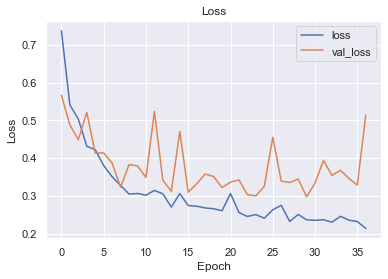

In [15]:
plt.plot(res.epoch, df.loss, label='loss')
plt.plot(res.epoch, df.val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

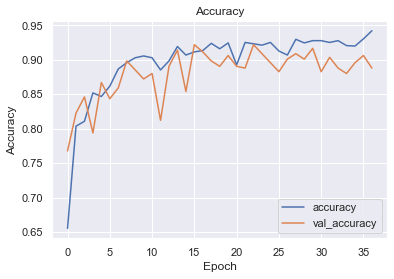

In [16]:
plt.plot(res.epoch, df.accuracy, label='accuracy')
plt.plot(res.epoch, df.val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
pred = model.predict(X_test)
pred = np.argmax(pred,1)
print('Misclassified examples: %d' % (y_test != pred).sum())

26/26 [==============================] - 0s 2ms/step
Misclassified examples: 68


In [18]:
# Evaluate model
(test_loss, test_accuracy) = model.evaluate(x=X_test,y=y_test)
print("Loss:", test_loss)
print('Accuracy', test_accuracy)

26/26 [==============================] - 0s 1ms/step - loss: 0.2835 - accuracy: 0.9173
Loss: 0.2835499346256256
Accuracy 0.9172749519348145


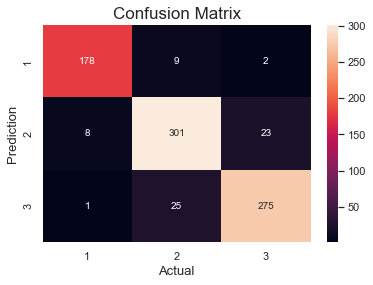

In [19]:
cm = confusion_matrix(y_test,pred)

sns.heatmap(cm, annot=True, fmt='g', xticklabels=['1','2','3'], yticklabels=['1','2','3'])

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [20]:
# save model
path='./web/model/model.h5'
model.save(path)